In [69]:
# importowanie potrzebnych bibliotek:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
#-------------------------------------------------------
from rdkit.Chem import AllChem
from rdkit import Chem
from rdkit.DataStructs.cDataStructs import ExplicitBitVect
from rdkit.Avalon import pyAvalonTools
from rdkit.Chem import PandasTools
from rdkit.Chem import rdMolDescriptors
from tqdm import tqdm
#--------------------------------------------------------
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
import time
from sklearn.model_selection import ShuffleSplit, cross_validate,train_test_split
#--------------------------------------------------------
from lightgbm import LGBMRegressor
from sklearn.model_selection import cross_val_score
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [70]:
termo_database = pd.read_excel('C:/Users/mbkil/excele/Database _500.xlsx') 
termo_database.head()

# importujemy wykonaną przez nas baze danych


,Unnamed: 0,CAS,Substances,Molecular Weight [g/mol],Formula,SMILES,Critical_Temperature,Critical_Pressure,Critical_Volume
0,1,74-99-7,Propyne,40.06,C3H4,C#CC,401.10,5627.59,0.164
1,2,74-99-7,Propyne,40.06,C3H4,C#CC,402.40,5630.00,0.164
2,3,75-28-5,Isobutane,58.12,C4H10,CC(C)C,407.69,3604.00,0.259
3,4,106-98-9,1-Butene,56.11,C4H8,C=CCC,417.15,4000.00,0.241
4,5,115-11-7,2-Methylpropene,56.11,C4H8,C=C(C)C,417.88,4000.00,0.239


In [71]:
termo_baza_podstawa = termo_database[["Critical_Temperature","Critical_Pressure","Critical_Volume","SMILES"]]
termo_baza_podstawa

# wyodrębniamy interesujące nas dane

,Critical_Temperature,Critical_Pressure,Critical_Volume,SMILES
0,401.10,5627.59,0.164,C#CC
1,402.40,5630.00,0.164,C#CC
2,407.69,3604.00,0.259,CC(C)C
3,417.15,4000.00,0.241,C=CCC
4,417.88,4000.00,0.239,C=C(C)C
...,...,...,...,...
987,957.28,1793.94,0.872,CCCOC(=O)CCCC(=O)Oc1cc(C)ccc1C
988,965.52,1379.91,1.044,CCCCCCCCCCCOc1cc(Cl)c(Cl)cc1Cl
989,966.58,1616.77,0.946,CCCCCOC(=O)CCCC(=O)OCc1ccccc1F
990,968.16,1155.35,1.141,CCCCCCCCCCCOC(=O)CC(=O)OCCC(C)C


In [72]:
# tworzymy struktury 2d dla naszych SMILESÓW
PandasTools.AddMoleculeColumnToFrame(termo_baza_podstawa,'SMILES','Stucture',includeFingerprints=True)

C:\Users\mbkil\anaconda3\lib\site-packages\rdkit\Chem\PandasTools.py:381: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frame[molCol] = frame[smilesCol].map(


,Critical_Temperature,Critical_Pressure,Critical_Volume,SMILES,Stucture
0,401.10,5627.59,0.164,C#CC,
1,402.40,5630.00,0.164,C#CC,
2,407.69,3604.00,0.259,CC(C)C,
3,417.15,4000.00,0.241,C=CCC,
4,417.88,4000.00,0.239,C=C(C)C,
...,...,...,...,...,...
987,957.28,1793.94,0.872,CCCOC(=O)CCCC(=O)Oc1cc(C)ccc1C,
988,965.52,1379.91,1.044,CCCCCCCCCCCOc1cc(Cl)c(Cl)cc1Cl,
989,966.58,1616.77,0.946,CCCCCOC(=O)CCCC(=O)OCc1ccccc1F,
990,968.16,1155.35,1.141,CCCCCCCCCCCOC(=O)CC(=O)OCCC(C)C,

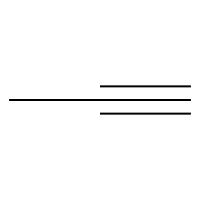
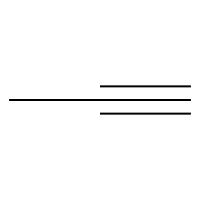
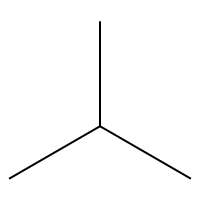
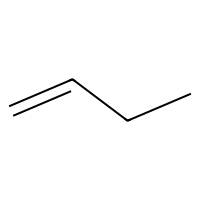
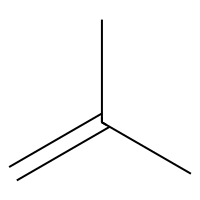
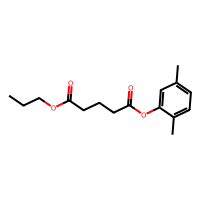
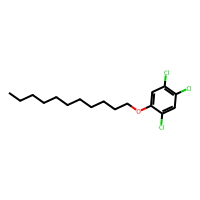
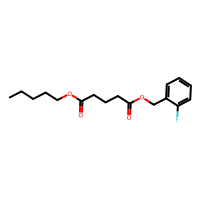
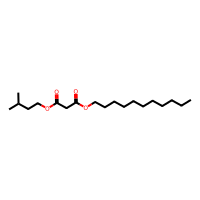
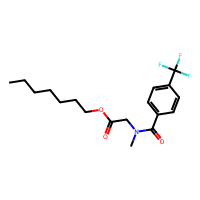

In [73]:
termo_baza_podstawa


In [74]:
def generate_AVfpts(data):
    
    Avalon_fpts = []
    
    for mol in tqdm(data):
      
        avfpts = pyAvalonTools.GetAvalonFP(mol, nBits=4096)
        Avalon_fpts.append(avfpts)
        
    return np.array(Avalon_fpts)

# Tworzymy fingerprinty

In [75]:
Avalon_fpts = generate_AVfpts(termo_baza_podstawa['Stucture'])

100%|██████████| 992/992 [00:00<00:00, 1116.34it/s]


In [76]:
Avalon_fpts

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [77]:
# Przchowujemy fingerprinty w nowej bazie

Avalon_fingerprints = pd.DataFrame(Avalon_fpts, columns=['Col_A_{}'.format(i + 1) 
                                                        for i in range(Avalon_fpts.shape[1])])
Avalon_fingerprints

Avalon_fingerprints.to_excel("Avalon_fingerprints.xlsx", index=False)

In [78]:
Avalon_fingerprints

,Col_A_1,Col_A_2,Col_A_3,Col_A_4,Col_A_5,Col_A_6,Col_A_7,Col_A_8,Col_A_9,Col_A_10,...,Col_A_4087,Col_A_4088,Col_A_4089,Col_A_4090,Col_A_4091,Col_A_4092,Col_A_4093,Col_A_4094,Col_A_4095,Col_A_4096
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
987,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
988,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
989,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
990,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Epoch 1/7000
17/17 [==============================] - 2s 56ms/step - loss: 604.0765 - val_loss: 581.4487
Epoch 2/7000
17/17 [==============================] - 1s 43ms/step - loss: 428.1476 - val_loss: 204.0334
Epoch 3/7000
17/17 [==============================] - 1s 47ms/step - loss: 204.0511 - val_loss: 163.8800
Epoch 4/7000
17/17 [==============================] - 1s 49ms/step - loss: 137.0345 - val_loss: 112.7899
Epoch 5/7000
17/17 [==============================] - 1s 47ms/step - loss: 109.4755 - val_loss: 99.7327
Epoch 6/7000
17/17 [==============================] - 1s 45ms/step - loss: 97.0675 - val_loss: 88.5917
Epoch 7/7000
17/17 [==============================] - 1s 46ms/step - loss: 85.1880 - val_loss: 78.3479
Epoch 8/7000
17/17 [==============================] - 1s 46ms/step - loss: 78.6432 - val_loss: 72.4841
Epoch 9/7000
17/17 [==============================] - 1s 47ms/step - loss: 72.7784 - val_loss: 70.4808
Epoch 10/7000
17/17 [==============================] - 1s 45ms/s

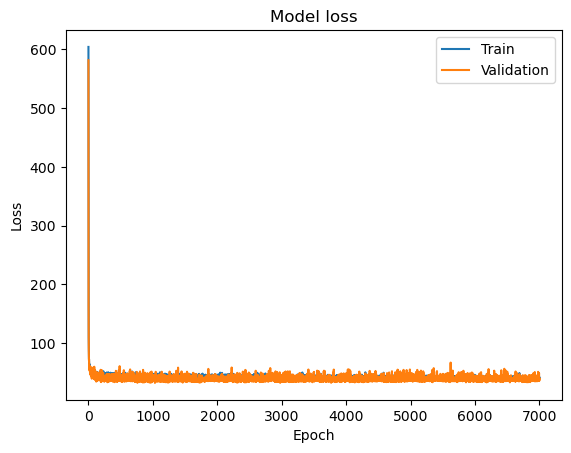

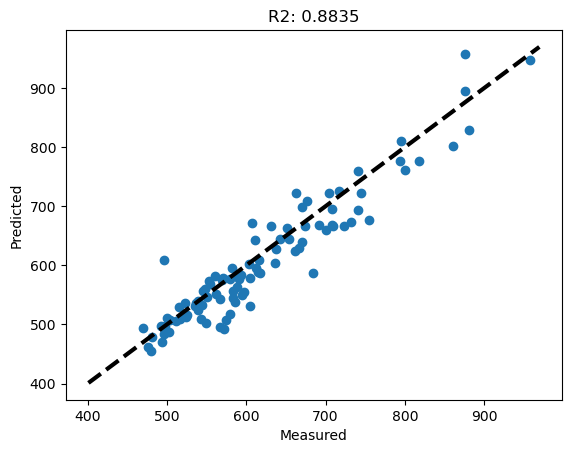

In [126]:
# pobranie kolumny TC i przekształcenie do tablicy numpy
y = termo_baza_podstawa["Critical_Temperature"].values

# wczytanie danych z arkusza "finger" i przekształcenie do tablicy numpy
X = Avalon_fingerprints.values

# Podział danych na zbiór treningowy, walidujący i testowy
X_train, X_val_test, y_train, y_val_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.5, random_state=42)


# normalizacja danych
X_train = X_train / 1.0
X_val = X_val / 1.0
X_test = X_test / 1.0

# utworzenie modelu
model = Sequential()
model.add(Dense(512, activation='relu', input_dim=X.shape[1], kernel_initializer='glorot_uniform'))
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='linear'))

# kompilacja modelu
model.compile(loss='mean_absolute_error', optimizer='adam')

# trenowanie modelu z danymi walidującymi
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=7000, batch_size=48)

# ocena modelu na zbiorze testowym
test_loss = model.evaluate(X_test, y_test)
print(f"Test loss: {test_loss:.4f}")

# predykcja na zbiorze testowym
y_pred = model.predict(X_test)

# obliczenie błędu MEA
mea = mean_absolute_error(y_test, y_pred)
print(f"MEA: {mea:.4f}")

# obliczenie współczynnika R2
r2 = r2_score(y_test, y_pred)
print(f"R2: {r2:.4f}")

# wykres błędu dla zbioru treningowego i walidacyjnego
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# wykres R2 dla zbioru testowego
plt.scatter(y_test, y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=3)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title(f"R2: {r2:.4f}")
plt.show()

In [1]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

NameError: name 'history' is not defined